In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

In [48]:
# A helper function to draw a 3D function with 2 variables on 2D (Contour plot)

def graph(LIST):
  plt.figure(figsize=(18,8))
  X = np.linspace(-2, 8, 200)
  Y = np.linspace(-2, 2, 200)
  x, y = np.meshgrid(X, Y)
  f = (1/2) * x**2 + (7/2) * y**2
  ctr = plt.contour( x, y, f, levels=9, colors='k')
  fil = plt.contourf(x, y, f, levels=10)
  plt.clabel(ctr)
  plt.scatter(np.array(LIST)[:,0],np.array(LIST)[:,1],c='white',s=70,marker=".")
  plt.plot(np.array(LIST)[:,0],np.array(LIST)[:,1],c='white')
  plt.show()

In [65]:
# A helper function to draw a 3D function with 2 variables on 2D (Contour plot) of 3 different results

def graph_multiple(LIST1,LIST2,LIST3):
  plt.figure(figsize=(18,8))
  X = np.linspace(-2, 8, 200)
  Y = np.linspace(-2, 2, 200)
  x, y = np.meshgrid(X, Y)
  f = (1/2) * x**2 + (7/2) * y**2
  ctr = plt.contour( x, y, f, levels=9, colors='k')
  fil = plt.contourf(x, y, f, levels=10)
  plt.clabel(ctr)
  plt.scatter(np.array(LIST1)[:,0],np.array(LIST1)[:,1],c='white',s=70,marker=".")
  plt.plot(np.array(LIST1)[:,0],np.array(LIST1)[:,1],c='white')
  plt.scatter(np.array(LIST2)[:,0],np.array(LIST2)[:,1],c='yellow',s=70,marker=".")
  plt.plot(np.array(LIST2)[:,0],np.array(LIST2)[:,1],c='yellow')
  plt.scatter(np.array(LIST3)[:,0],np.array(LIST3)[:,1],c='red',s=70,marker=".")
  plt.plot(np.array(LIST3)[:,0],np.array(LIST3)[:,1],c='red')
  plt.show()

In [104]:
# Helper function that performs gradient descent with constant step and returns the coordinates of the minimum, the number of iterations
# to find it and a list of all points traversed to plot them 

def gradient_descent_constant_step(taux_apprentissage, x0, eps, A, B):
  LIST=[]
  xn = x0
  xn_1 = xn - taux_apprentissage * (A @ xn - B)
  i = 1
  print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  while ((((xn_1 - xn)**2).sum())**(1/2) > eps):
    LIST.append(xn)
    xn = xn_1
    xn_1 = xn - taux_apprentissage * (A @ xn - B)
    i += 1
    print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()**(1/2)))
  return xn_1, i, LIST

# Initialization of all necessary variables

taux_apprentissage = 1/7
x0 = np.array([7,1.5])
eps = 1/1000
A = np.array([[1,0],[0,7]])
B = np.array([0,0])

Iteration: 1 | Loss: 3.25
Iteration: 2 | Loss: 0.8571428571428568
Iteration: 3 | Loss: 0.7346938775510203
Iteration: 4 | Loss: 0.629737609329446
Iteration: 5 | Loss: 0.5397750937109538
Iteration: 6 | Loss: 0.4626643660379606
Iteration: 7 | Loss: 0.39656945660396614
Iteration: 8 | Loss: 0.3399166770891138
Iteration: 9 | Loss: 0.291357151790669
Iteration: 10 | Loss: 0.249734701534859
Iteration: 11 | Loss: 0.21405831560130784
Iteration: 12 | Loss: 0.18347855622969234
Iteration: 13 | Loss: 0.15726733391116487
Iteration: 14 | Loss: 0.13480057192385564
Iteration: 15 | Loss: 0.11554334736330485
Iteration: 16 | Loss: 0.09903715488283271
Iteration: 17 | Loss: 0.08488898989957094
Iteration: 18 | Loss: 0.07276199134248934
Iteration: 19 | Loss: 0.06236742115070515
Iteration: 20 | Loss: 0.05345778955774727
Iteration: 21 | Loss: 0.045820962478069105
Iteration: 22 | Loss: 0.03927511069548778
Iteration: 23 | Loss: 0.03366438059613239
Iteration: 24 | Loss: 0.02885518336811349
Iteration: 25 | Loss: 0.02

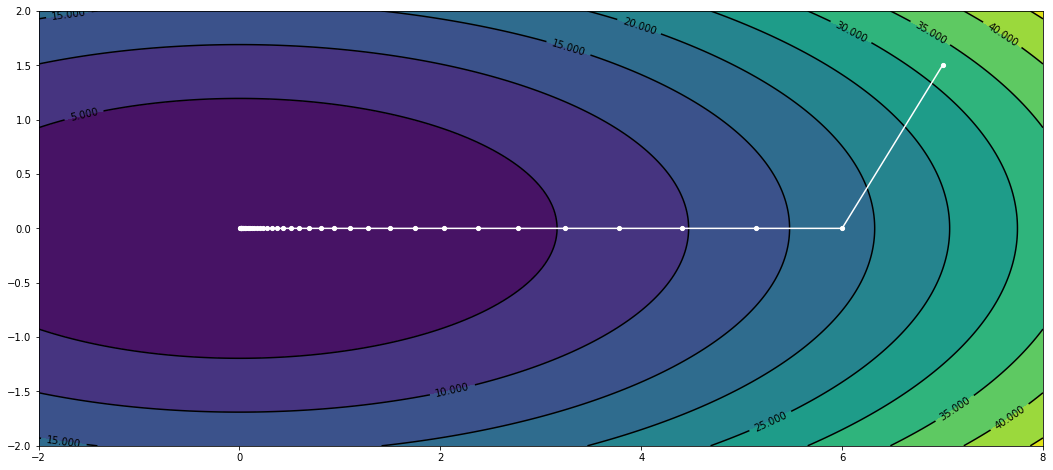

In [105]:
# calling the helper function, printing the coordinates of the minimum and plotting the function and the history of traversed points

taux_apprentissage = 1/7
X, I, LIST = gradient_descent_constant_step(taux_apprentissage, x0, eps, A, B)
print("\nthe minimum is x = " + str(X[0]) + " and y = " + str(X[1]) + " and was found within " + str(I) + " Iterations.\n")
graph(LIST)

In [108]:
# calculating the results of 3 different learning rates with the gradien descent with constant step

%%capture
taux_apprentissage = 1/7
X, I, LIST1 = gradient_descent_constant_step(taux_apprentissage, x0, eps, A, B)
taux_apprentissage = 0.25
X, I, LIST2 = gradient_descent_constant_step(taux_apprentissage, x0, eps, A, B)
taux_apprentissage = 0.01
X, I, LIST3 = gradient_descent_constant_step(taux_apprentissage, x0, eps, A, B)

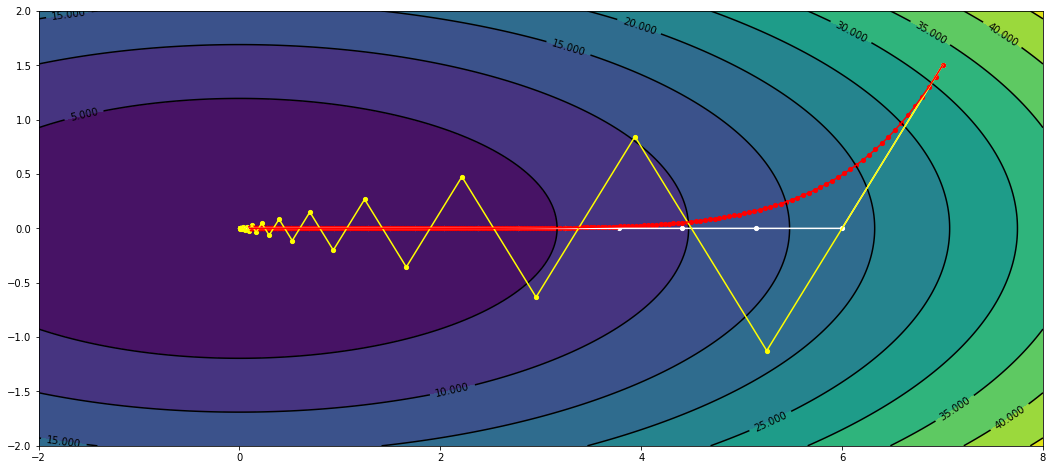

In [109]:
# plotting 3 different convergance paths of 3 different learning rates

graph_multiple(LIST1,LIST2,LIST3)

In [102]:
# Helper function that performs gradient descent with optimal step that returns the same output as the function above

def gradient_descent_optimal_step(x0, eps):
  LIST=[]
  A = np.array([[1,0],[0,7]])
  B = np.array([0,0])
  xn = x0
  if (abs(xn[0]) + abs(7*xn[1]) == 0):
    return xn, 0
  taux_apprentissage = (xn[0]**2 + 49 * xn[1]**2) / (xn[0]**2 + 343 * xn[1]**2)
  xn_1 = xn - taux_apprentissage * (A @ xn - B)
  i = 1
  print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  while (((((xn_1 - xn)**2).sum())**(1/2) > eps) and (abs(xn_1[0]) + abs(7*xn_1[1]) != 0)):
    LIST.append(xn)
    xn = xn_1
    taux_apprentissage = (xn[0]**2 + 49 * xn[1]**2) / (xn[0]**2 + 343 * xn[1]**2)
    xn_1 = xn - taux_apprentissage * (A @ xn - B)
    i += 1
    print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  return xn_1, i, LIST

# Initialization of all necessary variables

x0 = np.array([7,1.5])
eps = 1/1000

Iteration: 1 | Loss: 5.995377589663623
Iteration: 2 | Loss: 5.6756825100102635
Iteration: 3 | Loss: 1.6386020345229007
Iteration: 4 | Loss: 1.551225885129059
Iteration: 5 | Loss: 0.44784779396909336
Iteration: 6 | Loss: 0.42396694009053665
Iteration: 7 | Loss: 0.12240168285973163
Iteration: 8 | Loss: 0.11587478523463277
Iteration: 9 | Loss: 0.03345371389264515
Iteration: 10 | Loss: 0.03166984163978679
Iteration: 11 | Loss: 0.009143264594600948
Iteration: 12 | Loss: 0.008655712866766137
Iteration: 13 | Loss: 0.0024989538595074404
Iteration: 14 | Loss: 0.002365700658817852
Iteration: 15 | Loss: 0.0006829913240873108
Iteration: 16 | Loss: 0.0006465717721089515
Iteration: 17 | Loss: 0.00018666897229966623
Iteration: 18 | Loss: 0.0001767151118337234
Iteration: 19 | Loss: 5.101866449911018e-05
Iteration: 20 | Loss: 4.8298165953869107e-05
Iteration: 21 | Loss: 1.3943957022992726e-05
Iteration: 22 | Loss: 1.3200415121839727e-05
Iteration: 23 | Loss: 3.8110354194484915e-06
Iteration: 24 | Loss:

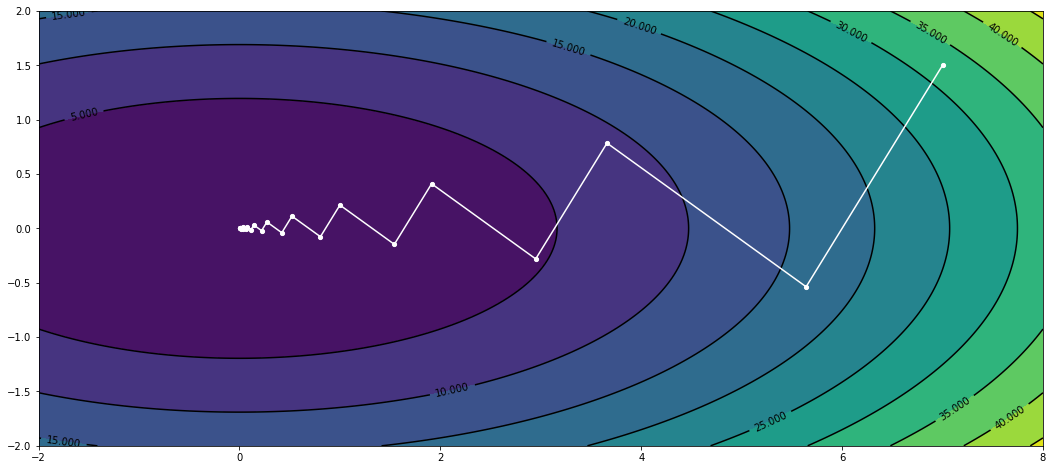

In [110]:
# calling the helper function, printing the coordinates of the minimum and plotting the function and the history of traversed points

X, I, LIST = gradient_descent_optimal_step(x0, eps)
print("\nthe minimum is x = " + str(X[0]) + " and y = " + str(X[1]) + " and was found within " + str(I) + " Iterations.\n")
graph(LIST)

In [111]:
# Helper function that performs Nesterov Accelerated gradient descent that returns the same output as the two functions above
# PS: beta is constant because the function is strongly convex

def nesterov_accelerated_gradient_descent(taux_apprentissage, x0, eps, beta, A, B):
  LIST=[]
  xn = x0
  xn__1 = x0
  xn_1 = xn - taux_apprentissage * (xn - beta * (xn - xn__1)) + beta * (xn - xn__1)
  i = 1
  print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  while ((((xn_1 - xn)**2).sum())**(1/2) > eps):
    LIST.append(xn)
    xn__1 = xn
    xn = xn_1
    xn_1 = xn - taux_apprentissage * (xn - beta * (xn - xn__1)) + beta * (xn - xn__1)
    i += 1
    print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  return xn_1, i, LIST

# Initialization of all necessary variables

taux_apprentissage = 1/7
x0 = np.array([7,1.5])
eps = 1/1000
beta = (7 ** (1/2) - 1) / (7 ** (1/2) + 1)
A = np.array([[1,0],[0,7]])
B = np.array([0,0])

Iteration: 1 | Loss: 1.0459183673469388
Iteration: 2 | Loss: 1.9718263800431202
Iteration: 3 | Loss: 1.9612336756867734
Iteration: 4 | Loss: 1.4362323457589765
Iteration: 5 | Loss: 0.8519408278825222
Iteration: 6 | Loss: 0.4212744696956638
Iteration: 7 | Loss: 0.1722269546318854
Iteration: 8 | Loss: 0.055209360319862746
Iteration: 9 | Loss: 0.011776350922037424
Iteration: 10 | Loss: 0.0007717964703680807
Iteration: 11 | Loss: 0.00031828094827812854
Iteration: 12 | Loss: 0.001507629403313119
Iteration: 13 | Loss: 0.001945603819175661
Iteration: 14 | Loss: 0.0016428510200676633
Iteration: 15 | Loss: 0.0010821771158121213
Iteration: 16 | Loss: 0.0005884363940293874
Iteration: 17 | Loss: 0.0002668502523288808
Iteration: 18 | Loss: 9.830380268150439e-05
Iteration: 19 | Loss: 2.6894019585612507e-05
Iteration: 20 | Loss: 4.021806963873652e-06
Iteration: 21 | Loss: 6.102535644948983e-09

the minimum is x = 0.0066232508227816395 and y = 0.0014192680334532072 and was found within 21 Iterations.


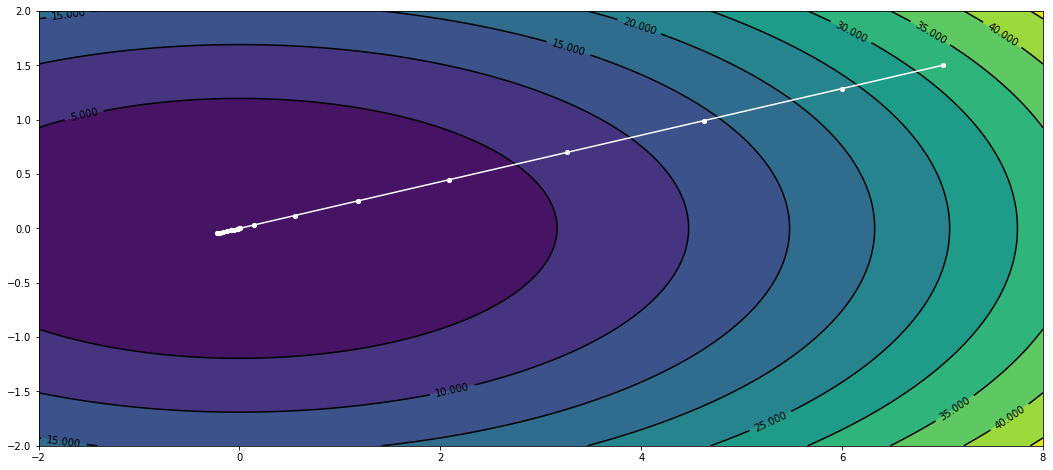

In [112]:
# calling the helper function, printing the coordinates of the minimum and plotting the function and the history of traversed points

X, I, LIST = nesterov_accelerated_gradient_descent(taux_apprentissage, x0, eps, beta, A, B)
print("\nthe minimum is x = " + str(X[0]) + " and y = " + str(X[1]) + " and was found within " + str(I) + " Iterations.\n")
graph(LIST)